<a href="https://colab.research.google.com/github/swjh9523/Python_Tutorial/blob/master/%EC%84%9C%EC%9A%B8_%EC%A2%85%ED%95%A9%EB%B3%91%EC%9B%90_%EB%B6%84%EC%84%9D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

---

# < 목차 >

---

## 1. 분석개요

1) 분석 목적

2) 사용 데이터


In [ ]:
# 라이브러리 임포트

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
#시각화를 위한 폰트 설정
# minus 폰트 깨짐 방지

plt.rc('axes', unicode_minus=False)

import matplotlib
matplotlib.font_manager._rebuild()

In [ ]:
#경고메세지 무시하기

import warnings
warnings.filterwarnings(action='ignore')

In [ ]:
# retina 설정
from IPython.display import set_matplotlib_formats

set_matplotlib_formats("retina")

In [ ]:
# 구글드라이브에서 파일 가져오기
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df = '/content/drive/My Drive/소상공인시장진흥공단_상가업소정보_의료기관_201909.csv'

In [ ]:
df = pd.read_csv(df)

In [ ]:
df.head()

In [ ]:
df.tail()

In [ ]:
df.shape

(91335, 39)

In [ ]:
df.info()

NameError: ignored

In [ ]:
df.columns

Index(['상가업소번호', '상호명', '지점명', '상권업종대분류코드', '상권업종대분류명', '상권업종중분류코드',
       '상권업종중분류명', '상권업종소분류코드', '상권업종소분류명', '표준산업분류코드', '표준산업분류명', '시도코드',
       '시도명', '시군구코드', '시군구명', '행정동코드', '행정동명', '법정동코드', '법정동명', '지번코드',
       '대지구분코드', '대지구분명', '지번본번지', '지번부번지', '지번주소', '도로명코드', '도로명', '건물본번지',
       '건물부번지', '건물관리번호', '건물명', '도로명주소', '구우편번호', '신우편번호', '동정보', '층정보',
       '호정보', '경도', '위도'],
      dtype='object')

In [ ]:
df.dtypes

상가업소번호         int64
상호명           object
지점명           object
상권업종대분류코드     object
상권업종대분류명      object
상권업종중분류코드     object
상권업종중분류명      object
상권업종소분류코드     object
상권업종소분류명      object
표준산업분류코드      object
표준산업분류명       object
시도코드         float64
시도명           object
시군구코드        float64
시군구명          object
행정동코드          int64
행정동명          object
법정동코드        float64
법정동명          object
지번코드           int64
대지구분코드         int64
대지구분명         object
지번본번지          int64
지번부번지        float64
지번주소          object
도로명코드          int64
도로명           object
건물본번지          int64
건물부번지        float64
건물관리번호        object
건물명           object
도로명주소         object
구우편번호        float64
신우편번호        float64
동정보           object
층정보           object
호정보           object
경도           float64
위도           float64
dtype: object

In [ ]:
#결측치 확인하기

df.isnull()


#sum으로 column별 결측치 개수 확인하기

df.isnull().sum()

상가업소번호           0
상호명              0
지점명          89989
상권업종대분류코드        0
상권업종대분류명         0
상권업종중분류코드        0
상권업종중분류명         0
상권업종소분류코드        0
상권업종소분류명         0
표준산업분류코드      4922
표준산업분류명       4922
시도코드           379
시도명            379
시군구코드          379
시군구명           379
행정동코드            0
행정동명           379
법정동코드           55
법정동명            55
지번코드             0
대지구분코드           0
대지구분명            0
지번본번지            0
지번부번지        19256
지번주소             0
도로명코드            0
도로명              0
건물본번지            0
건물부번지        80731
건물관리번호           0
건물명          44882
도로명주소            0
구우편번호           12
신우편번호            2
동정보          83929
층정보          47291
호정보          75784
경도               0
위도               0
dtype: int64

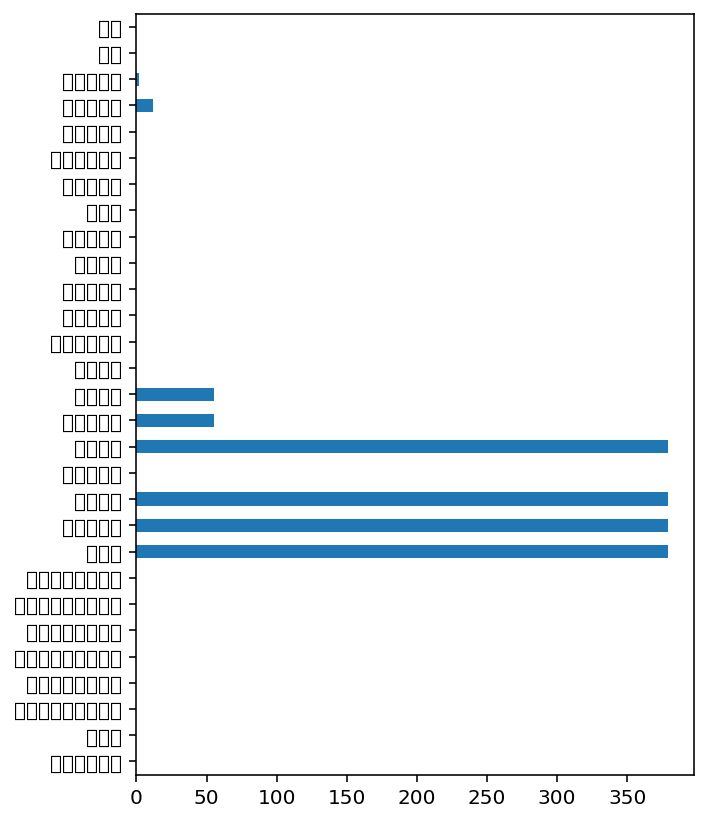

In [ ]:
null_count = df.isnull().sum()
null_count.plot.barh(figsize=(5,7))

In [ ]:
df_null_count = null_count.reset_index()
df_null_count.head()

,index,0
0,상가업소번호,0
1,상호명,0
2,지점명,89989
3,상권업종대분류코드,0
4,상권업종대분류명,0


In [ ]:
df_null_count.columns = ["컬럼명", "결측치수"]
df_null_count.head()

,컬럼명,결측치수
0,상가업소번호,0
1,상호명,0
2,지점명,89989
3,상권업종대분류코드,0
4,상권업종대분류명,0


In [ ]:
df_null_count.sort_values(by="결측치수",ascending=False).head(10)

,컬럼명,결측치수
2,지점명,89989
34,동정보,83929
28,건물부번지,80731
36,호정보,75784
35,층정보,47291
30,건물명,44882
23,지번부번지,19256
9,표준산업분류코드,4922
10,표준산업분류명,4922
11,시도코드,379


In [ ]:
# NaN == not a number의 약자로 결측치를 의미함.

df["지점명"]

0         NaN
1         NaN
2         NaN
3         NaN
4         수지점
         ... 
91330     베스트
91331    봄산후조
91332     NaN
91333     NaN
91334     NaN
Name: 지점명, Length: 91335, dtype: object

In [ ]:
df_null_count_top = df_null_count.sort_values(by="결측치수",ascending=False).head(10)

df_null_count_top

,컬럼명,결측치수
2,지점명,89989
34,동정보,83929
28,건물부번지,80731
36,호정보,75784
35,층정보,47291
30,건물명,44882
23,지번부번지,19256
9,표준산업분류코드,4922
10,표준산업분류명,4922
11,시도코드,379


In [ ]:
drop_columns= df_null_count_top["컬럼명"].tolist()
drop_columns

['지점명',
 '동정보',
 '건물부번지',
 '호정보',
 '층정보',
 '건물명',
 '지번부번지',
 '표준산업분류코드',
 '표준산업분류명',
 '시도코드']

In [ ]:
df[drop_columns].head()

,지점명,동정보,건물부번지,호정보,층정보,건물명,지번부번지,표준산업분류코드,표준산업분류명,시도코드
0,NaN,NaN,NaN,NaN,NaN,산호한양아파트,NaN,Q86201,일반 의원,41.0
1,NaN,NaN,NaN,NaN,4,NaN,14.0,Q86201,일반 의원,11.0
2,NaN,NaN,NaN,NaN,NaN,한라프라자,1.0,Q86201,일반 의원,41.0
3,NaN,NaN,NaN,NaN,5,NaN,1.0,NaN,NaN,26.0
4,수지점,NaN,NaN,NaN,1,NaN,2.0,G47811,의약품 및 의료용품 소매업,41.0


In [ ]:
print(df.shape)
df = df.drop(drop_columns, axis=1)
print(df.shape)

(91335, 39)
(91335, 29)


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 91335 entries, 0 to 91334
Data columns (total 29 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   상가업소번호     91335 non-null  int64  
 1   상호명        91335 non-null  object 
 2   상권업종대분류코드  91335 non-null  object 
 3   상권업종대분류명   91335 non-null  object 
 4   상권업종중분류코드  91335 non-null  object 
 5   상권업종중분류명   91335 non-null  object 
 6   상권업종소분류코드  91335 non-null  object 
 7   상권업종소분류명   91335 non-null  object 
 8   시도명        90956 non-null  object 
 9   시군구코드      90956 non-null  float64
 10  시군구명       90956 non-null  object 
 11  행정동코드      91335 non-null  int64  
 12  행정동명       90956 non-null  object 
 13  법정동코드      91280 non-null  float64
 14  법정동명       91280 non-null  object 
 15  지번코드       91335 non-null  int64  
 16  대지구분코드     91335 non-null  int64  
 17  대지구분명      91335 non-null  object 
 18  지번본번지      91335 non-null  int64  
 19  지번주소       91335 non-null  object 
 20  도로명코드 

In [ ]:
#기초통계값 보기(숫자타입에만 가능)
# 데이터 타입 보기

df.dtypes

상가업소번호         int64
상호명           object
상권업종대분류코드     object
상권업종대분류명      object
상권업종중분류코드     object
상권업종중분류명      object
상권업종소분류코드     object
상권업종소분류명      object
시도명           object
시군구코드        float64
시군구명          object
행정동코드          int64
행정동명          object
법정동코드        float64
법정동명          object
지번코드           int64
대지구분코드         int64
대지구분명         object
지번본번지          int64
지번주소          object
도로명코드          int64
도로명           object
건물본번지          int64
건물관리번호        object
도로명주소         object
구우편번호        float64
신우편번호        float64
경도           float64
위도           float64
dtype: object

In [ ]:
df["위도"].mean()

36.62471119236673

In [ ]:
df["위도"].median()

37.23465231770329

In [ ]:
#최대값
df["위도"].max()

38.499658570559795

In [ ]:
df["위도"].min()

33.2192896688307

In [ ]:
df["위도"].count()

91335

In [ ]:
#기초통계량 요약값
df["위도"].describe()

count    91335.000000
mean        36.624711
std          1.041361
min         33.219290
25%         35.811830
50%         37.234652
75%         37.507463
max         38.499659
Name: 위도, dtype: float64

In [ ]:
# 2개의 컬럼을 describe로 요약하기(두개 이상을 가져올땐 리스트로 묶어주기)

df[["위도","경도"]].describe()

,위도,경도
count,91335.000000,91335.000000
mean,36.624711,127.487524
std,1.041361,0.842877
min,33.219290,124.717632
25%,35.811830,126.914297
50%,37.234652,127.084550
75%,37.507463,128.108919
max,38.499659,130.909912


In [ ]:
# describe로 문자열 데이터타입의 요약보기
#include = 해당타입만 가져오기
# top = 가장많이 등장한 object자료를 보여줌

df.describe(include="object")

,상호명,상권업종대분류코드,상권업종대분류명,상권업종중분류코드,상권업종중분류명,상권업종소분류코드,상권업종소분류명,시도명,시군구명,행정동명,법정동명,대지구분명,지번주소,도로명,건물관리번호,도로명주소
count,91335,91335,91335,91335,91335,91335,91335,90956,90956,90956,91280,91335,91335,91335,91335,91335
unique,56910,1,1,5,5,34,34,17,228,2791,2822,2,53118,16610,54142,54031
top,리원,S,의료,S01,병원,S02A01,약국,경기도,서구,중앙동,중동,대지,서울특별시 동대문구 제기동 965-1,서울특별시 강남구 강남대로,1123010300109650001031604,서울특별시 동대문구 약령중앙로8길 10
freq,152,91335,91335,60774,60774,18964,18964,21374,3165,1856,874,91213,198,326,198,198


In [ ]:
#문자열 데이터 요약하기 - pandas로 시각화하기

#중복을 제거한 값 보기 unique

#"상권없종대분류명"

df["상권업종대분류명"].unique()

array(['의료'], dtype=object)

In [ ]:
# 갯수

df["상권업종대분류명"].nunique()


1

In [ ]:
# "상권업종중분류명"

df["상권업종중분류명"].unique()

array(['병원', '약국/한약방', '수의업', '유사의료업', '의료관련서비스업'], dtype=object)

In [ ]:
df["상권업종중분류명"].nunique()

5

In [ ]:
# "상권업종소분류명"

df["상권업종소분류명"].unique()

array(['산부인과', '내과/외과', '신경외과', '기타병원', '약국', '동물병원', '한약방', '탕제원',
       '정형/성형외과', '소아과', '이비인후과의원', '노인/치매병원', '언어치료', '수의업-종합', '한의원',
       '치과의원', '침구원', '일반병원', '안과의원', '조산원', '한방병원', '종합병원', '유사의료업기타',
       '응급구조대', '혈액원', '치과병원', '척추교정치료', '피부과', '비뇨기과', '치과기공소', '산후조리원',
       '접골원', '수의업-기타', '제대혈'], dtype=object)

In [ ]:
df["상권업종소분류명"].nunique()

34

In [ ]:
# nunique 대신 len을 사용할 수도 있다.

len(df["상권업종소분류명"].unique())

34

In [ ]:
# value_counts를 사용하여 카테고리 형태의 데이터 갯수를 세어볼 수 있다.

# 시도코드 세어보기.

df["시도명"].head()

0      경기도
1    서울특별시
2      경기도
3    부산광역시
4      경기도
Name: 시도명, dtype: object

In [ ]:
df["시도명"].value_counts()

경기도        21374
서울특별시      18943
부산광역시       6473
경상남도        4973
인천광역시       4722
대구광역시       4597
경상북도        4141
전라북도        3894
충청남도        3578
전라남도        3224
광주광역시       3214
대전광역시       3067
충청북도        2677
강원도         2634
울산광역시       1997
제주특별자치도     1095
세종특별자치시      353
Name: 시도명, dtype: int64

In [ ]:
# normalize=True 옵션을 사용하여 비율을 구할 수 있다.

df["시도명"].value_counts(normalize=True)

경기도        0.234993
서울특별시      0.208266
부산광역시      0.071166
경상남도       0.054675
인천광역시      0.051915
대구광역시      0.050541
경상북도       0.045528
전라북도       0.042812
충청남도       0.039338
전라남도       0.035446
광주광역시      0.035336
대전광역시      0.033720
충청북도       0.029432
강원도        0.028959
울산광역시      0.021956
제주특별자치도    0.012039
세종특별자치시    0.003881
Name: 시도명, dtype: float64

In [ ]:
city = df["시도명"].value_counts()
city_normalize = df["시도명"].value_counts(normalize=True)

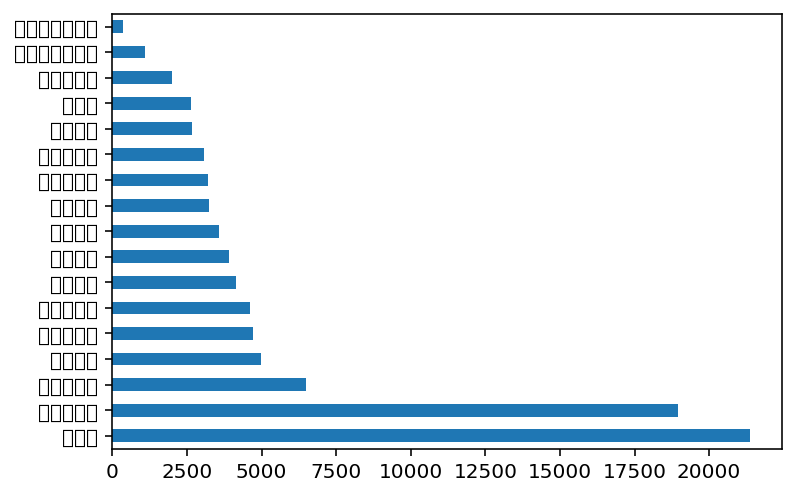

In [ ]:
# pandas로 위에 분석한 시도명 수를 막대그래프로 표현해보기

city.plot.barh()

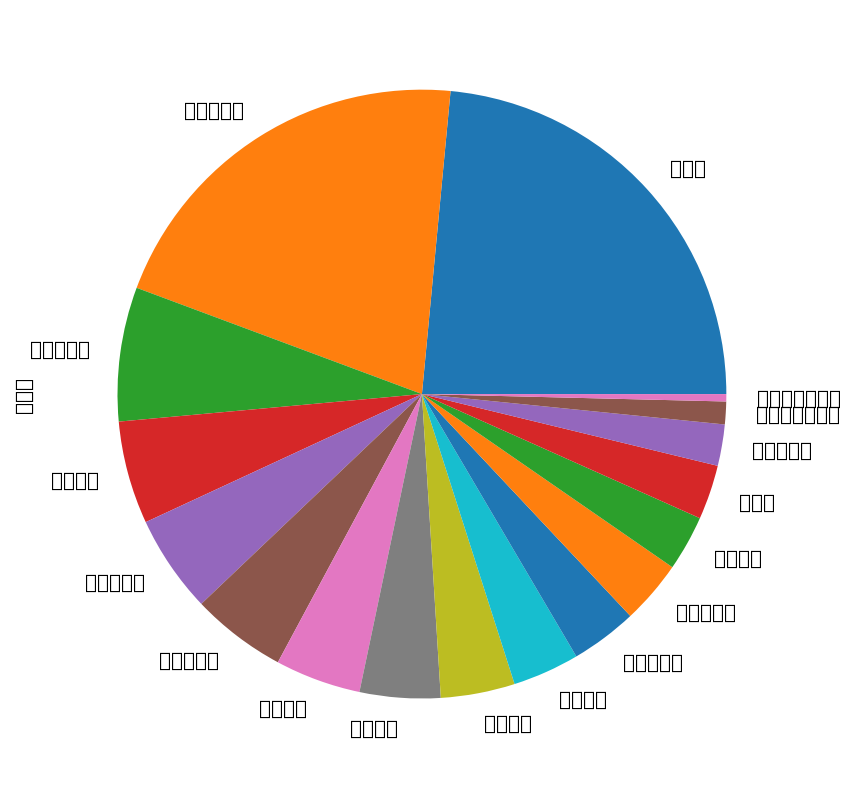

In [ ]:
#판다스의 plot.pie()를 사용하여 파이그림 그려보기.
#서울과 경기도의 차이를 정확하게 알수 없고 나머지 지역의 차이를 알기 어렵기에 barh로 보는것이 더 좋다.

city_normalize.plot.pie(figsize=(7,7))

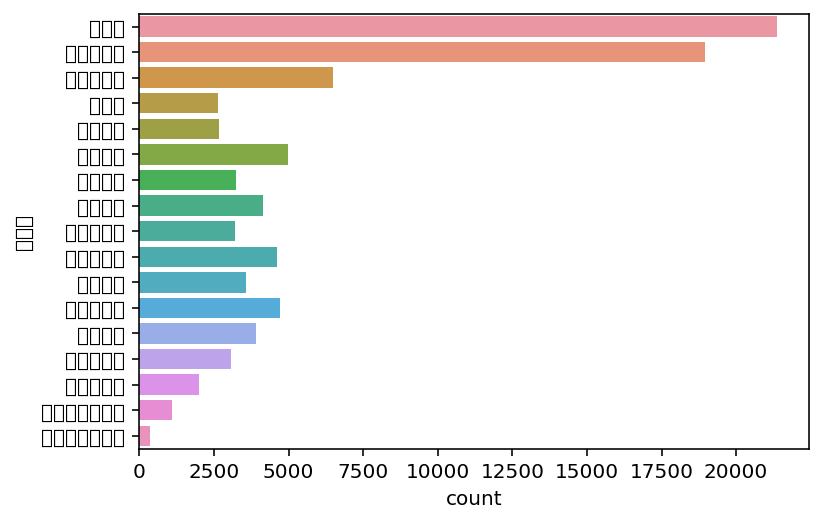

In [ ]:
# seaborn의 countplot으로 그려보기

sns.countplot(data=df,y="시도명")

In [ ]:
# "상권업종대분류명"으로 갯수를 세어보기.

df["상권업종대분류명"].value_counts()

의료    91335
Name: 상권업종대분류명, dtype: int64

In [ ]:
# "상권업종중분류명"으로 갯수 세어보기

c = df["상권업종중분류명"].value_counts()

In [ ]:
# 비율구하기

n = df["상권업종중분류명"].value_counts(normalize=True)

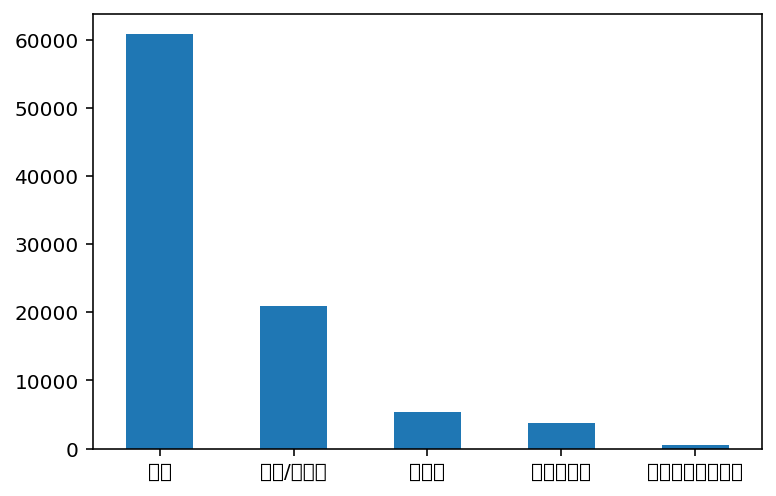

In [ ]:
#판다스의 plot.bar()를 사용하여 막대그래프 그려보기
# rot=글씨 회전값
c.plot.bar(rot=0)

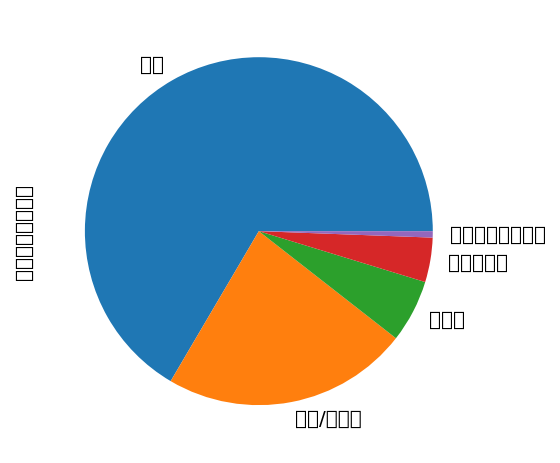

In [ ]:
n.plot.pie()

In [ ]:
# "상권업종소분류명"에 대한 그룹화된 값을 카운트

c2 = df["상권업종소분류명"].value_counts()

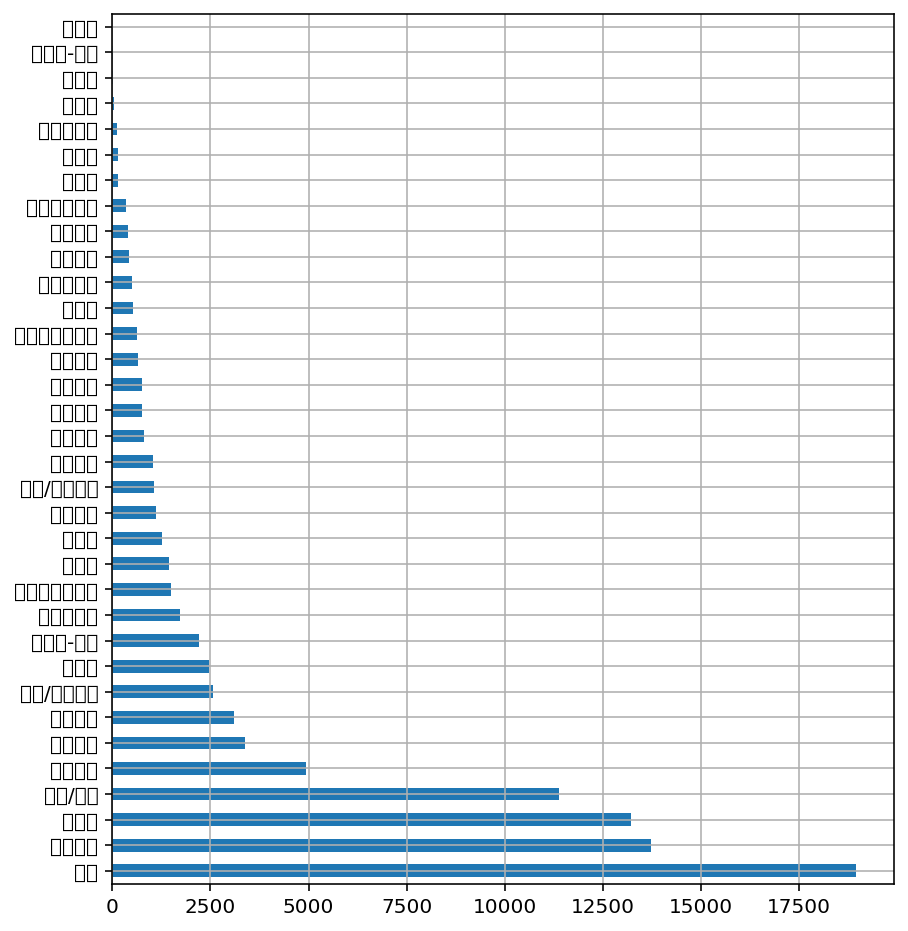

In [ ]:
c2.plot.barh(figsize=(7,8),grid=True)

In [ ]:
# 색인을 이용하여 원라는 데이터만 따로 추출해오기
# df_medical 이라는 변수에 담아 head로 미리보기
# 색인하여 변수에 저장할때는 .copy를 해줘야 원본데이터에 지장이 없음

df_medical = df[df["상권업종중분류명"] == "약국/한약방"].copy()
df_medical.head(1)


,상가업소번호,상호명,상권업종대분류코드,상권업종대분류명,상권업종중분류코드,상권업종중분류명,상권업종소분류코드,상권업종소분류명,시도명,시군구코드,시군구명,행정동코드,행정동명,법정동코드,법정동명,지번코드,대지구분코드,대지구분명,지번본번지,지번주소,도로명코드,도로명,건물본번지,건물관리번호,도로명주소,구우편번호,신우편번호,경도,위도
4,20364049,더블유스토어수지점,S,의료,S02,약국/한약방,S02A01,약국,경기도,41465.0,용인시 수지구,4146551000,풍덕천1동,4.146510e+09,풍덕천동,4146510100207120002,1,대지,712,경기도 용인시 수지구 풍덕천동 712-2,414653205024,경기도 용인시 수지구 문정로,32,4146510100107120002026238,경기도 용인시 수지구 문정로 32,448170.0,16837.0,127.095522,37.323528


In [ ]:
# "상권업종대분류명" 에서 "의료"만 가져옵니다.
# df.loc를 사용하면 행,열을 함께 가져올 수 있다.
# 이 기능을 통해 "상권업종중분류명"만 가져온다.
# 그리고 가져온 결과를 value_counts를 통해 중분류의 갯수를 세어본다.

df.loc[df["상권업종대분류명"] == "의료", "상권업종중분류명"].value_counts()

병원          60774
약국/한약방      20923
수의업          5323
유사의료업        3774
의료관련서비스업      541
Name: 상권업종중분류명, dtype: int64

In [ ]:
# 유사의료업만 따로 모아보기.

df_medi = df[df["상권업종중분류명"] == "유사의료업"]
df_medi.shape

(3774, 29)

In [ ]:
# 상호명을 그룹화해서 갯수를 세어봅니다.
# value_counts를 사용하여 상위 10개만 출력하기.

df["상호명"].value_counts().head(10)

리원       152
온누리약국    149
경희한의원    141
우리약국     119
중앙약국     111
전자담배      98
조은약국      95
건강약국      87
제일약국      79
사랑약국      73
Name: 상호명, dtype: int64

In [ ]:
# 유사의료업만 df_medi 변수에 담겨져있다.
# df_medi 변수에서 상호명으로 갯수를 세어본다.
# 가장 많은 상호 상위 10개를 출력해본다.

df_medi["상호명"].value_counts().head(10)

리원          32
고려수지침       22
대한적십자사      17
헌혈의집        12
고려수지침학회     10
수치과기공소      10
제일치과기공소      9
스마일치과기공소     8
아트치과기공소      8
미소치과기공소      8
Name: 상호명, dtype: int64

In [ ]:
# 여러 조건으로 색인하기
# "상권업종소분류명"이 "약국"인것과
# "시도명"이 "서울특별시"인 데이터만 가져옵니다.
# 조건은 각각 괄호로 묶어주기!!
#판다스에서 여러 조건으로 색인할때 and == & / or == |

df_seoul_drug = df[(df["상권업종소분류명"] == "약국") & (df["시도명"] == "서울특별시")]
print(df_seoul_drug.shape)
df_seoul_drug.head(1)

(3579, 29)


,상가업소번호,상호명,상권업종대분류코드,상권업종대분류명,상권업종중분류코드,상권업종중분류명,상권업종소분류코드,상권업종소분류명,시도명,시군구코드,시군구명,행정동코드,행정동명,법정동코드,법정동명,지번코드,대지구분코드,대지구분명,지번본번지,지번주소,도로명코드,도로명,건물본번지,건물관리번호,도로명주소,구우편번호,신우편번호,경도,위도
33,20816709,이즈타워약,S,의료,S02,약국/한약방,S02A01,약국,서울특별시,11680.0,강남구,1168064000,역삼1동,1.168010e+09,역삼동,1168010100208210000,1,대지,821,서울특별시 강남구 역삼동 821,116803122010,서울특별시 강남구 테헤란로,101,1168010100108210001000001,서울특별시 강남구 테헤란로 101,135080.0,6134.0,127.028023,37.498656


In [ ]:
# 구별로보기
# 위에서 색인한 데이터로 "시군구명"으로 그룹화해서 갯수를 세어봅니다.
# 구별로 약국이 몇개가 있는지 확인해봅니다.

df_seoul_drug["시군구명"].value_counts()
df_seoul_drug["시군구명"].value_counts().head()

강남구     374
동대문구    261
광진구     212
서초구     191
송파구     188
Name: 시군구명, dtype: int64

In [ ]:
#nomarlize=True를 통해 비율 구하기

ab = df_seoul_drug["시군구명"].value_counts(normalize=True)
ab.head()

강남구     0.104498
동대문구    0.072925
광진구     0.059234
서초구     0.053367
송파구     0.052529
Name: 시군구명, dtype: float64

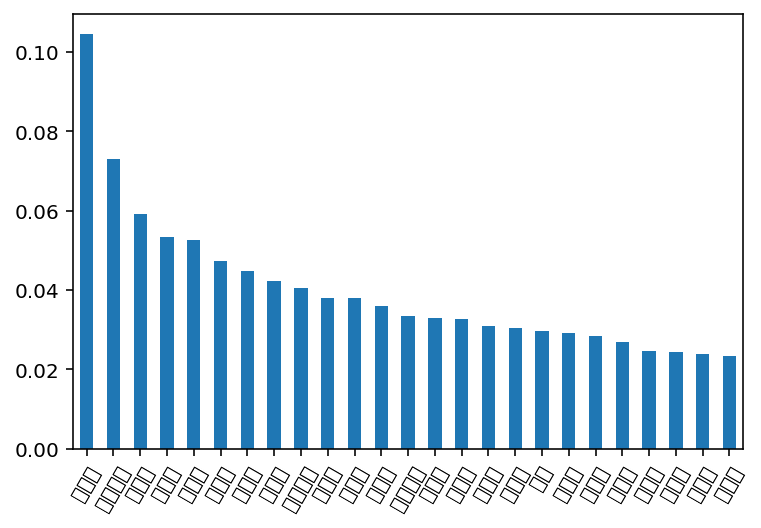

In [ ]:
ab.plot.bar(rot=60)

In [ ]:
# "상권업종소분류명"이 "종합병원" 인것과 "시도명"이 "서울특별시"인 데이터만 가져오기
# 결과를 df_seoul_hospital에 할당하여 재사용하기.

df_seoul_hospital = df[(df["상권업종소분류명"] == "종합병원") & (df["시도명"] == "서울특별시")].copy()

In [ ]:
# "시군구명"으로 그룹화해서 구별로 종합병원의 수를 세어봅니다.

df_seoul_hospital["시군구명"].value_counts()

강남구     15
영등포구     8
서초구      6
광진구      6
송파구      5
강동구      5
중구       5
서대문구     4
도봉구      4
강북구      4
양천구      4
성북구      3
중랑구      2
구로구      2
금천구      2
관악구      2
성동구      2
강서구      2
종로구      2
노원구      2
동대문구     2
은평구      1
마포구      1
동작구      1
용산구      1
Name: 시군구명, dtype: int64

In [ ]:
# 텍스트 테이터 색인하기
# 색인하기 전에 상호명 중에 종합병원이 아닌 데이터를 찾아봅니다.
# str.contains("") = 포함된 문자만 보여주기
# 앞에 ~를 붙이면 ""가 아닌것만 가져옴

df_seoul_hospital[~df_seoul_hospital["상호명"].str.contains("종합병원")]

,상가업소번호,상호명,상권업종대분류코드,상권업종대분류명,상권업종중분류코드,상권업종중분류명,상권업종소분류코드,상권업종소분류명,시도명,시군구코드,시군구명,행정동코드,행정동명,법정동코드,법정동명,지번코드,대지구분코드,대지구분명,지번본번지,지번주소,도로명코드,도로명,건물본번지,건물관리번호,도로명주소,구우편번호,신우편번호,경도,위도
305,25155642,대진의료재단,S,의료,S01,병원,S01B01,종합병원,서울특별시,11215.0,광진구,1121577000,중곡4동,1.121510e+09,중곡동,1121510100200580025,1,대지,58,서울특별시 광진구 중곡동 58-25,112153104006,서울특별시 광진구 긴고랑로,119,1121510100100580025000733,서울특별시 광진구 긴고랑로 119,143220.0,4944.0,127.088279,37.559048
353,20471487,홍익병원별관,S,의료,S01,병원,S01B01,종합병원,서울특별시,11470.0,양천구,1147065000,신정4동,1.147010e+09,신정동,1147010100208970013,1,대지,897,서울특별시 양천구 신정동 897-13,114702005008,서울특별시 양천구 국회대로,250,1147010100108970013001044,서울특별시 양천구 국회대로 250,158070.0,7937.0,126.862805,37.529213
385,20737057,SNUH,S,의료,S01,병원,S01B01,종합병원,서울특별시,11680.0,강남구,1168064000,역삼1동,1.168010e+09,역삼동,1168010100207360055,1,대지,736,서울특별시 강남구 역삼동 736-55,116804166727,서울특별시 강남구 테헤란로26길,10,1168010100107360055027688,서울특별시 강남구 테헤란로26길 10,135080.0,6236.0,127.035825,37.499630
1917,23210677,평화드림여의도성모병원의료기매장,S,의료,S01,병원,S01B01,종합병원,서울특별시,11560.0,영등포구,1156054000,여의동,1.156011e+09,여의도동,1156011000200620000,1,대지,62,서울특별시 영등포구 여의도동 62,115603118001,서울특별시 영등포구 63로,10,1156011000100620000031477,서울특별시 영등포구 63로 10,150713.0,7345.0,126.936693,37.518296
2461,20024045,한양,S,의료,S01,병원,S01B01,종합병원,서울특별시,11200.0,성동구,1120055000,사근동,1.120011e+09,행당동,1120010700200150001,1,대지,15,서울특별시 성동구 행당동 15-1,112003103002,서울특별시 성동구 마조로,22,1120010700100150001019623,서울특별시 성동구 마조로 22-2,133070.0,4763.0,127.041325,37.559469
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71991,28505952,서울성모병원응급의료센터,S,의료,S01,병원,S01B01,종합병원,서울특별시,11650.0,서초구,1165058100,반포4동,1.165011e+09,반포동,1165010700205050000,1,대지,505,서울특별시 서초구 반포동 505,116502121003,서울특별시 서초구 반포대로,222,1165010700101230000017226,서울특별시 서초구 반포대로 222,137701.0,6591.0,127.005841,37.502382
76508,12292992,라마르의원,S,의료,S01,병원,S01B01,종합병원,서울특별시,11740.0,강동구,1174062000,천호3동,1.174011e+09,천호동,1174010900204530008,1,대지,453,서울특별시 강동구 천호동 453-8,117404172367,서울특별시 강동구 천호대로157길,18,1174010900104530021010314,서울특별시 강동구 천호대로157길 18,134864.0,5335.0,127.127466,37.538485
90492,16031909,가톨릭대학교여의도성모병원,S,의료,S01,병원,S01B01,종합병원,서울특별시,11140.0,중구,1114055000,명동,1.114013e+09,명동2가,1114012700200010001,1,대지,1,서울특별시 중구 명동2가 1-1,111404103165,서울특별시 중구 명동길,74,1114012700100010001019574,서울특별시 중구 명동길 74,100809.0,4537.0,126.986758,37.563662
90581,16332576,씨엠병원,S,의료,S01,병원,S01B01,종합병원,서울특별시,11560.0,영등포구,1156053500,영등포동,1.156010e+09,영등포동4가,1156010500200900000,1,대지,90,서울특별시 영등포구 영등포동4가 90,115604154717,서울특별시 영등포구 영등포로36길,13,1156010500100900000035097,서울특별시 영등포구 영등포로36길 13,150030.0,7301.0,126.903857,37.518807


In [ ]:
# 의원은 종합병원이라고 봐야할지가 애매해 상호명만 뽑아서 보기

df_seoul_hospital.loc[~df_seoul_hospital["상호명"].str.contains("종합병원"), "상호명"]

305                대진의료재단
353                홍익병원별관
385                  SNUH
1917     평화드림여의도성모병원의료기매장
2461                   한양
               ...       
71991        서울성모병원응급의료센터
76508               라마르의원
90492       가톨릭대학교여의도성모병원
90581                씨엠병원
90788              성베드로병원
Name: 상호명, Length: 91, dtype: object

In [ ]:
df_seoul_hospital.loc[~df_seoul_hospital["상호명"].str.contains("종합병원"), "상호명"].unique()

array(['대진의료재단', '홍익병원별관', 'SNUH', '평화드림여의도성모병원의료기매장', '한양', '백산의료재단친구병원',
       '서울보훈병원', '서울성모병원장례식장꽃배달', '서울대학교병원', '알콜중독및정신질환상담소',
       '강남성모병원장례식장꽃배달', '제일병원', '이랜드클리닉', '사랑나눔의료재단', '우울증센터', '성심의료재단',
       '다나의료재단', '서울아산병원신관', '원자력병원장례식장', '국민의원', '고려대학교구로병원', '학교법인일송학원',
       '삼성의료원장례식장', '희명스포츠의학센터인공신장실', '연세대학교의과대학강남세브란스', '국립정신병원',
       '코아클리닉', '수서제일의원', '사랑의의원', '한국전력공사부속한일병원', '신촌연세병원', '창동제일의원',
       '영동세브란스병원', '제일성심의원', '삼성의료재단강북삼성태', '서울시립보라매병원', '서울이의원',
       '서울대학교병원비상계획외래', '평화드림서울성모병원의료', '홍익병원', '사랑나눔의료재단서', '독일의원',
       '서울연합의원', '우신향병원', '동부제일병원', '아산재단금강병원', '명곡안연구소', '아산재단서울중앙병원',
       '메디힐특수여객', '삼성생명공익재단삼성서', '성광의료재단차병원', '한국건강관리협회서울특',
       '정해복지부설한신메디피아', '성베드로병원', '성애의료재단', '실로암의원', 'Y&T성모마취과', '광진성모의원',
       '서울현대의원', '이노신경과의원', '송정훼밀리의원', '서울중앙의원', '영남의료재단', '인제대학교서울백병원',
       '한국필의료재단', '세브란스의원', '가톨릭대학교성바오로병원장례식장', '서울연세의원', '사랑의병원',
       '성삼의료재단미즈메디병원', '씨엠충무병원', '성신의원', '원진재단부설녹색병원', '송파제일의원',
       '카톨릭성모의원', '한양성심의원', '관악

In [ ]:
# 상호명에서 특정 단어가 들어가는 데이터만 가져옵니다. - 꽃배달

df_seoul_hospital[df_seoul_hospital["상호명"].str.contains("꽃배달")]

,상가업소번호,상호명,상권업종대분류코드,상권업종대분류명,상권업종중분류코드,상권업종중분류명,상권업종소분류코드,상권업종소분류명,시도명,시군구코드,시군구명,행정동코드,행정동명,법정동코드,법정동명,지번코드,대지구분코드,대지구분명,지번본번지,지번주소,도로명코드,도로명,건물본번지,건물관리번호,도로명주소,구우편번호,신우편번호,경도,위도
2803,20895655,서울성모병원장례식장꽃배달,S,의료,S01,병원,S01B01,종합병원,서울특별시,11650.0,서초구,1165058100,반포4동,1.165011e+09,반포동,1165010700205510000,1,대지,551,서울특별시 서초구 반포동 551,116504163330,서울특별시 서초구 사평대로28길,55,1165010700105510000017194,서울특별시 서초구 사평대로28길 55,137040.0,6578.0,127.000682,37.498257
4644,22020310,강남성모병원장례식장꽃배달,S,의료,S01,병원,S01B01,종합병원,서울특별시,11650.0,서초구,1165058100,반포4동,1.165011e+09,반포동,1165010700205470006,1,대지,547,서울특별시 서초구 반포동 547-6,116504163242,서울특별시 서초구 반포대로39길,56,1165010700105470006016762,서울특별시 서초구 반포대로39길 56-24,137040.0,6578.0,127.001756,37.499095


In [ ]:
# 특정 단어가 들어가는 데이터만 가져옵니다. -의료기

df_seoul_hospital[df_seoul_hospital["상호명"].str.contains("의료기")]

,상가업소번호,상호명,상권업종대분류코드,상권업종대분류명,상권업종중분류코드,상권업종중분류명,상권업종소분류코드,상권업종소분류명,시도명,시군구코드,시군구명,행정동코드,행정동명,법정동코드,법정동명,지번코드,대지구분코드,대지구분명,지번본번지,지번주소,도로명코드,도로명,건물본번지,건물관리번호,도로명주소,구우편번호,신우편번호,경도,위도
1917,23210677,평화드림여의도성모병원의료기매장,S,의료,S01,병원,S01B01,종합병원,서울특별시,11560.0,영등포구,1156054000,여의동,1.156011e+09,여의도동,1156011000200620000,1,대지,62,서울특별시 영등포구 여의도동 62,115603118001,서울특별시 영등포구 63로,10,1156011000100620000031477,서울특별시 영등포구 63로 10,150713.0,7345.0,126.936693,37.518296


In [ ]:
# 꽃배달|의료기|장례식장|상담소|어린이집은 종합병원과 무관하기 때문에
# 전처리를 위해 해당 텍스트를 한번에 검색합니다.
# 제거할 데이터의 인덱스만 drop_row에 담아주고 list 형태로 반환합니다.

drop_row = df_seoul_hospital[df_seoul_hospital["상호명"].str.contains("꽃배달|의료기|장례식장|상담소|어린이집")].index
drop_row = drop_row.tolist()
drop_row

[1917, 2803, 4431, 4644, 7938, 10283, 47008, 60645, 70177]

In [ ]:
# 의원으로 '끝나는' 데이터도 종합병원으로 볼 수 없기 때문에 인덱스를 찾아서
# drop_row2에 담아주고 list형태로 변환하기.

drop_row2 = df_seoul_hospital[df_seoul_hospital["상호명"].str.endswith("의원")].index
drop_row2 = drop_row2.tolist()
drop_row2

[8479,
 12854,
 13715,
 14966,
 16091,
 18047,
 20200,
 20415,
 30706,
 32889,
 34459,
 34720,
 35696,
 37251,
 45120,
 49626,
 51575,
 55133,
 56320,
 56404,
 56688,
 57551,
 62113,
 76508]

In [ ]:
# 삭제할 행을 drop_row에 합쳐줍니다.

drop_row = drop_row + drop_row2
len(drop_row)

57

In [ ]:
# 해당 셀을 삭제하고 삭제 전과 후의 행의 갯수를 비교합니다.
# axis=0 행기준 axis=1 열기준
print(df_seoul_hospital.shape)
df_seoul_hospital = df_seoul_hospital.drop(drop_row,axis=0)
print(df_seoul_hospital.shape)

(91, 29)
(58, 29)


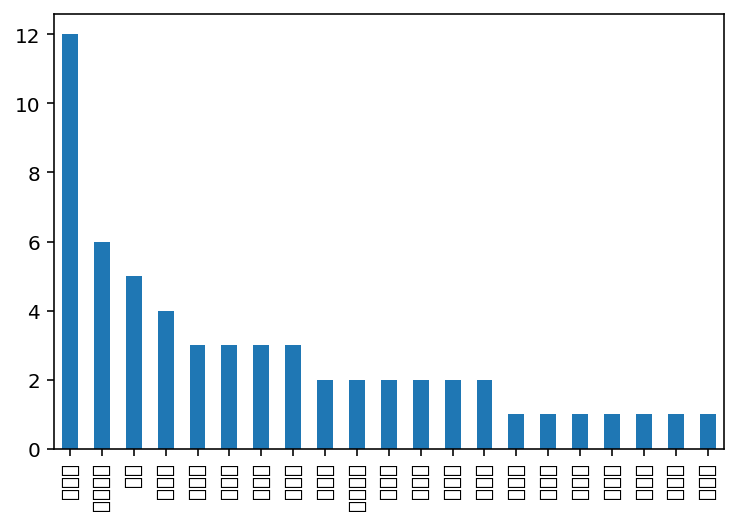

In [ ]:
# 시군구명에 따라 종합병원의 숫자를 countplot으로 그립니다.

df_seoul_hospital["시군구명"].value_counts().plot.bar()

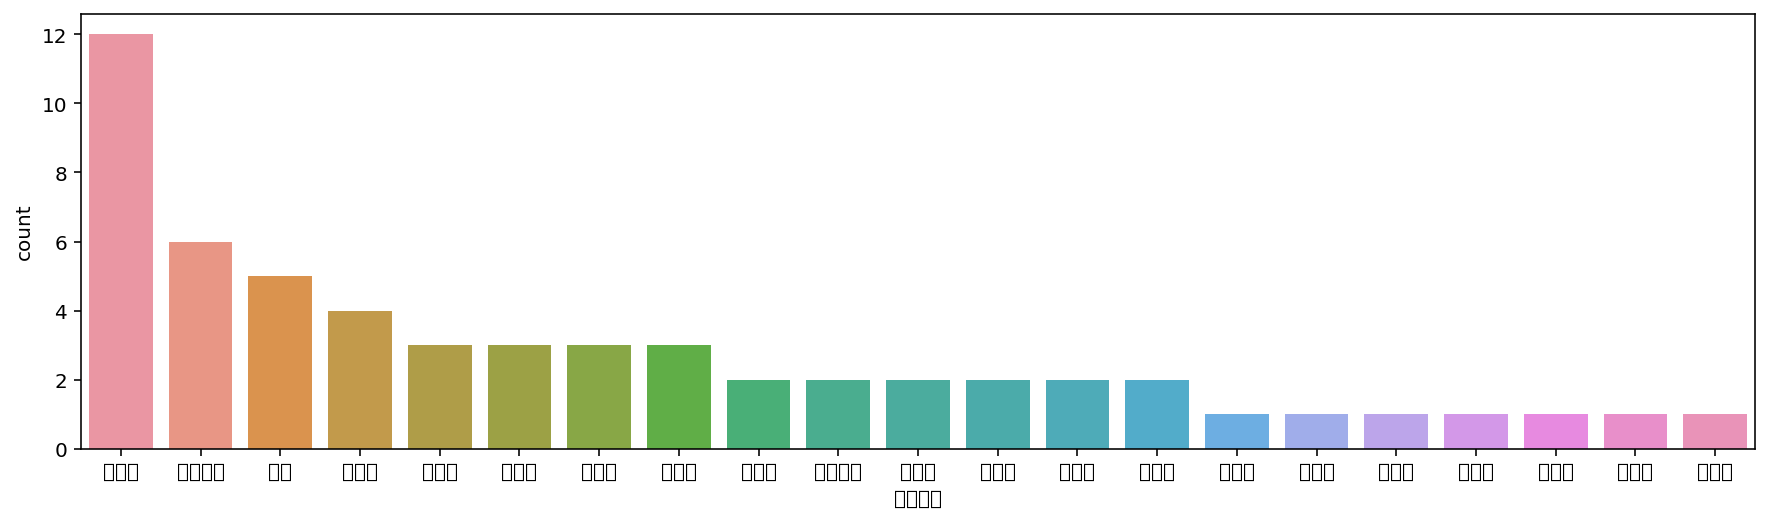

In [ ]:
# 위에 차트를 seaborn을 이용하여 내림차순으로 그리기

plt.figure(figsize=(15,4))
sns.countplot(data=df_seoul_hospital, x="시군구명",
              order=df_seoul_hospital["시군구명"].value_counts().index)

In [ ]:
# 전처리 후에는 다시한번 확인하는 습관!

df_seoul_hospital["상호명"].unique()

array(['대진의료재단', '홍익병원별관', 'SNUH', '한양', '백산의료재단친구병원', '서울보훈병원',
       '서울대학교병원', '제일병원', '이랜드클리닉', '사랑나눔의료재단', '우울증센터', '성심의료재단',
       '다나의료재단', '서울아산병원신관', '고려대학교구로병원', '학교법인일송학원', '희명스포츠의학센터인공신장실',
       '연세대학교의과대학강남세브란스', '국립정신병원', '코아클리닉', '한국전력공사부속한일병원', '신촌연세병원',
       '영동세브란스병원', '삼성의료재단강북삼성태', '서울시립보라매병원', '서울대학교병원비상계획외래',
       '평화드림서울성모병원의료', '홍익병원', '사랑나눔의료재단서', '우신향병원', '동부제일병원', '아산재단금강병원',
       '명곡안연구소', '아산재단서울중앙병원', '메디힐특수여객', '삼성생명공익재단삼성서', '성광의료재단차병원',
       '한국건강관리협회서울특', '정해복지부설한신메디피아', '성베드로병원', '성애의료재단', 'Y&T성모마취과',
       '영남의료재단', '인제대학교서울백병원', '한국필의료재단', '사랑의병원', '성삼의료재단미즈메디병원',
       '씨엠충무병원', '원진재단부설녹색병원', '강남센트럴병원', '우리들병원', '건국대학교병원', '서울적십자병원',
       '서울성모병원응급의료센터', '가톨릭대학교여의도성모병원', '씨엠병원'], dtype=object)

In [ ]:
# scatter plot
# 서울에 있는 데이터의 위도와 경도보기
# 결과를 df_seoul이라는 데이터 프레임에 저장하기
# 새로운 변수에 데이터프레임을 지정시 copy()를 사용하기

df_seoul = df[df["시도명"] == "서울특별시"].copy()
df_seoul.shape

(18943, 29)

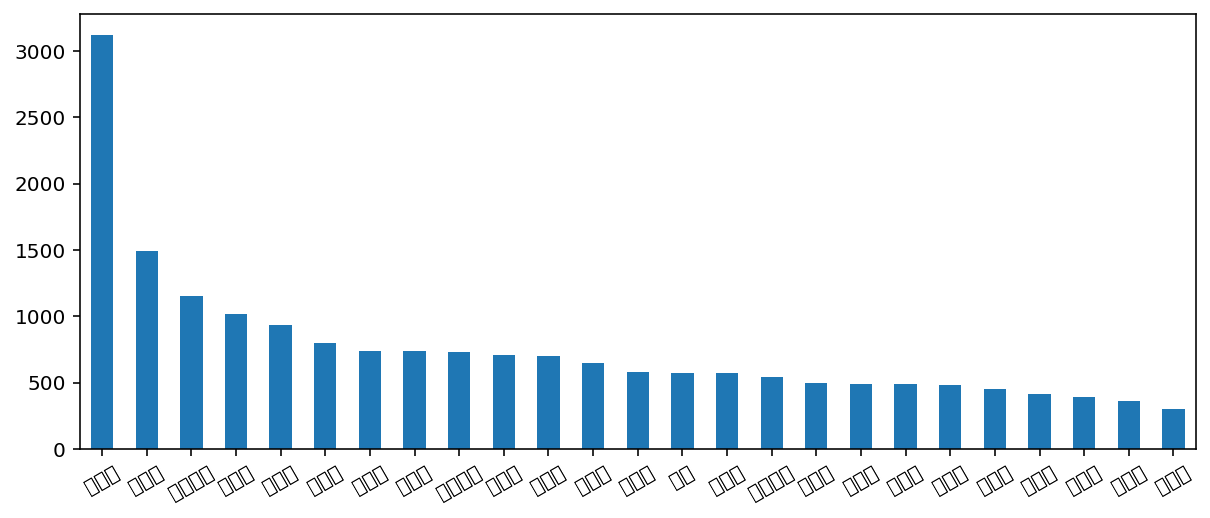

In [ ]:
# seaborn의 countplot을 이용하여 위에서 만든 df_seoul 데이터프레임의
# 시군구명을 시각화하기.

df_seoul["시군구명"].value_counts().plot.bar(figsize=(10,4),rot=30)

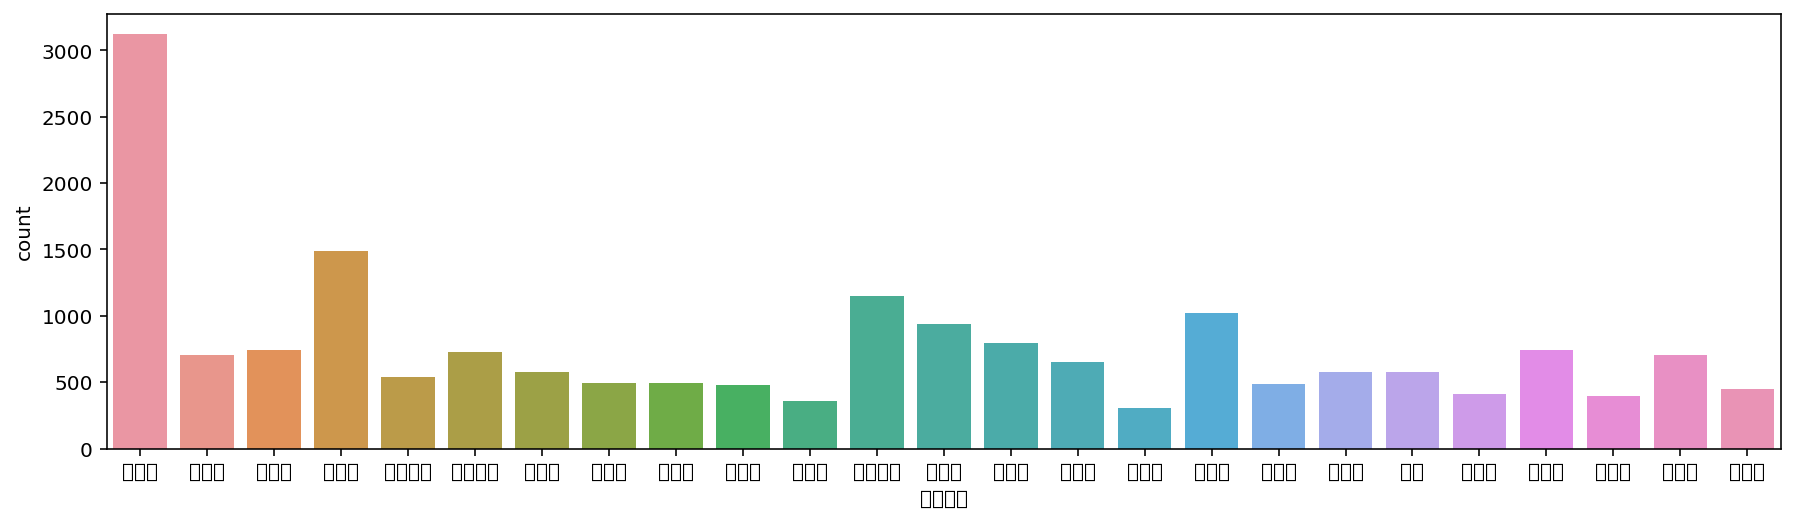

In [ ]:
plt.figure(figsize=(15,4))
sns.countplot(data=df_seoul,x="시군구명")

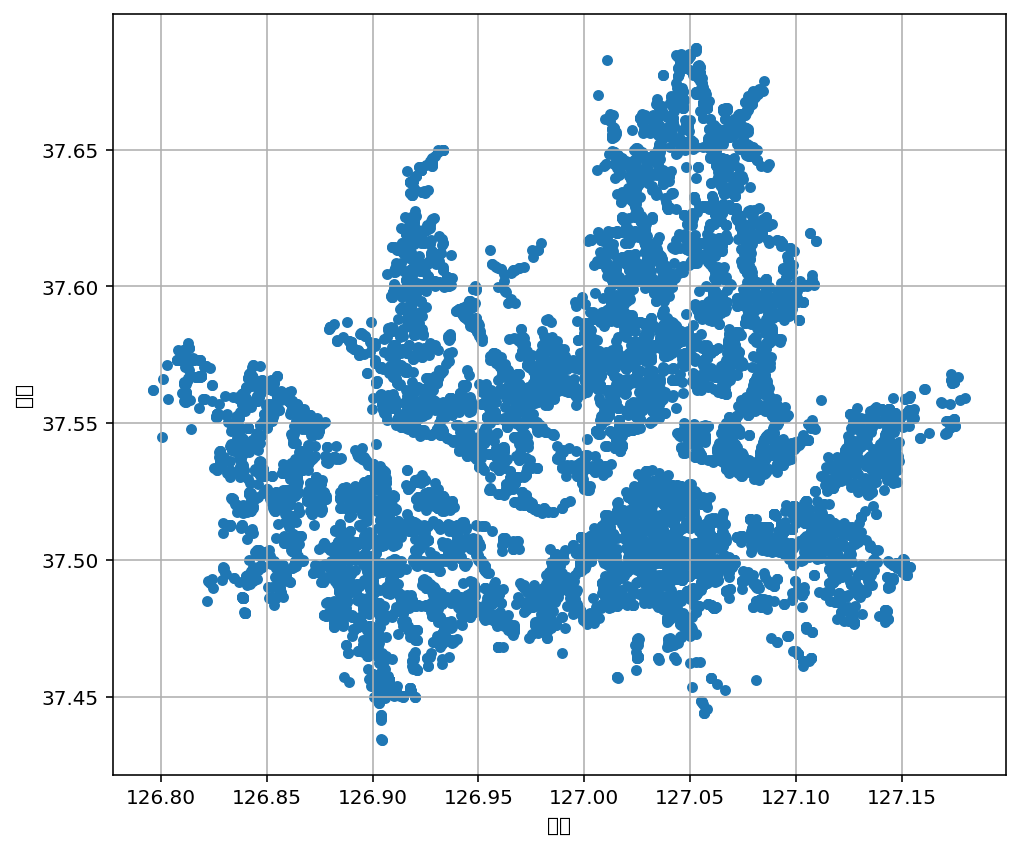

In [ ]:
# Pandas의 plot.scatter를 통해 경도와 위도를 표시하기

df_seoul[["위도","경도", "시군구명"]].plot.scatter(x="경도",y="위도", figsize=(8,7), grid=True)

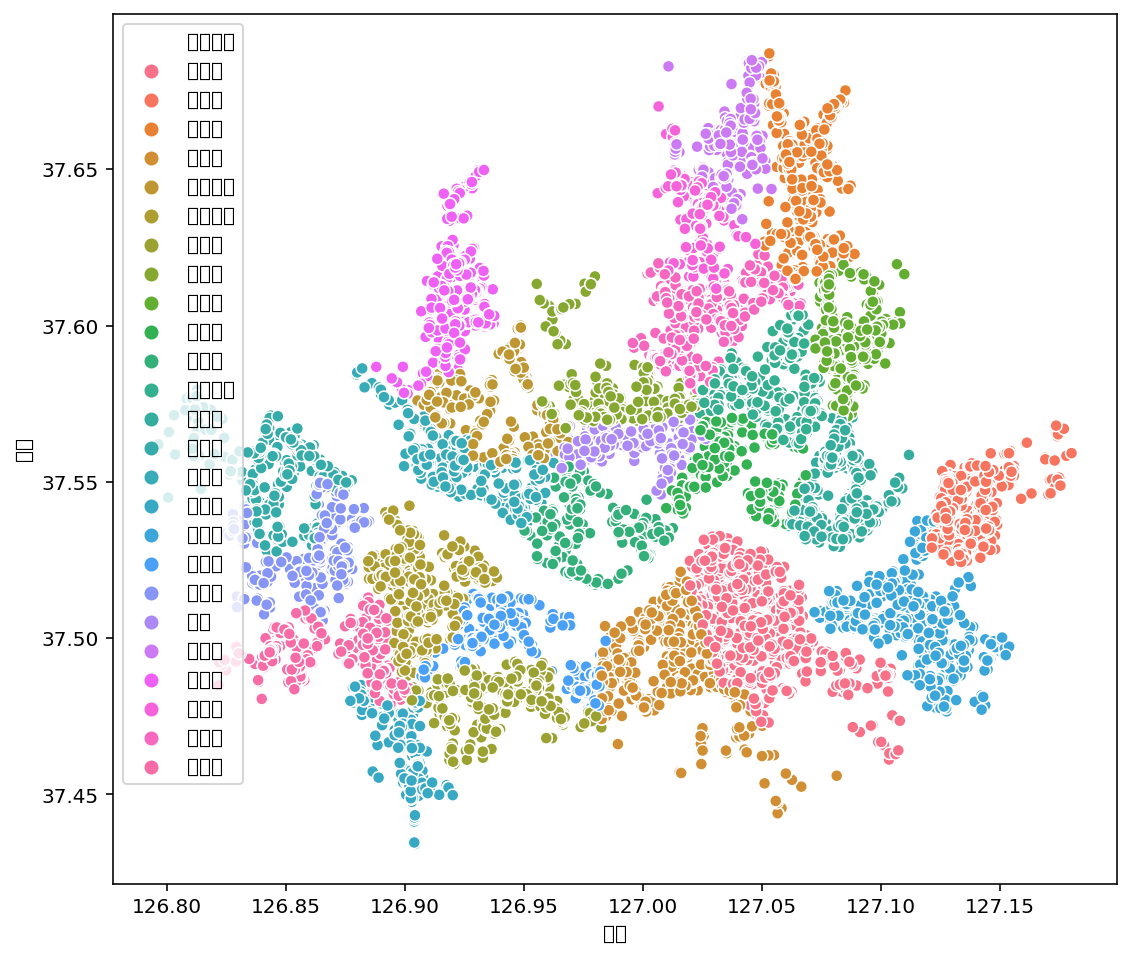

In [ ]:
# seaborn의 scatterplot을 통해 구별 경도와 위도를 표시해보기
# hue = 색상
plt.figure(figsize=(9,8))
sns.scatterplot(data=df_seoul, x="경도", y="위도",hue="시군구명")

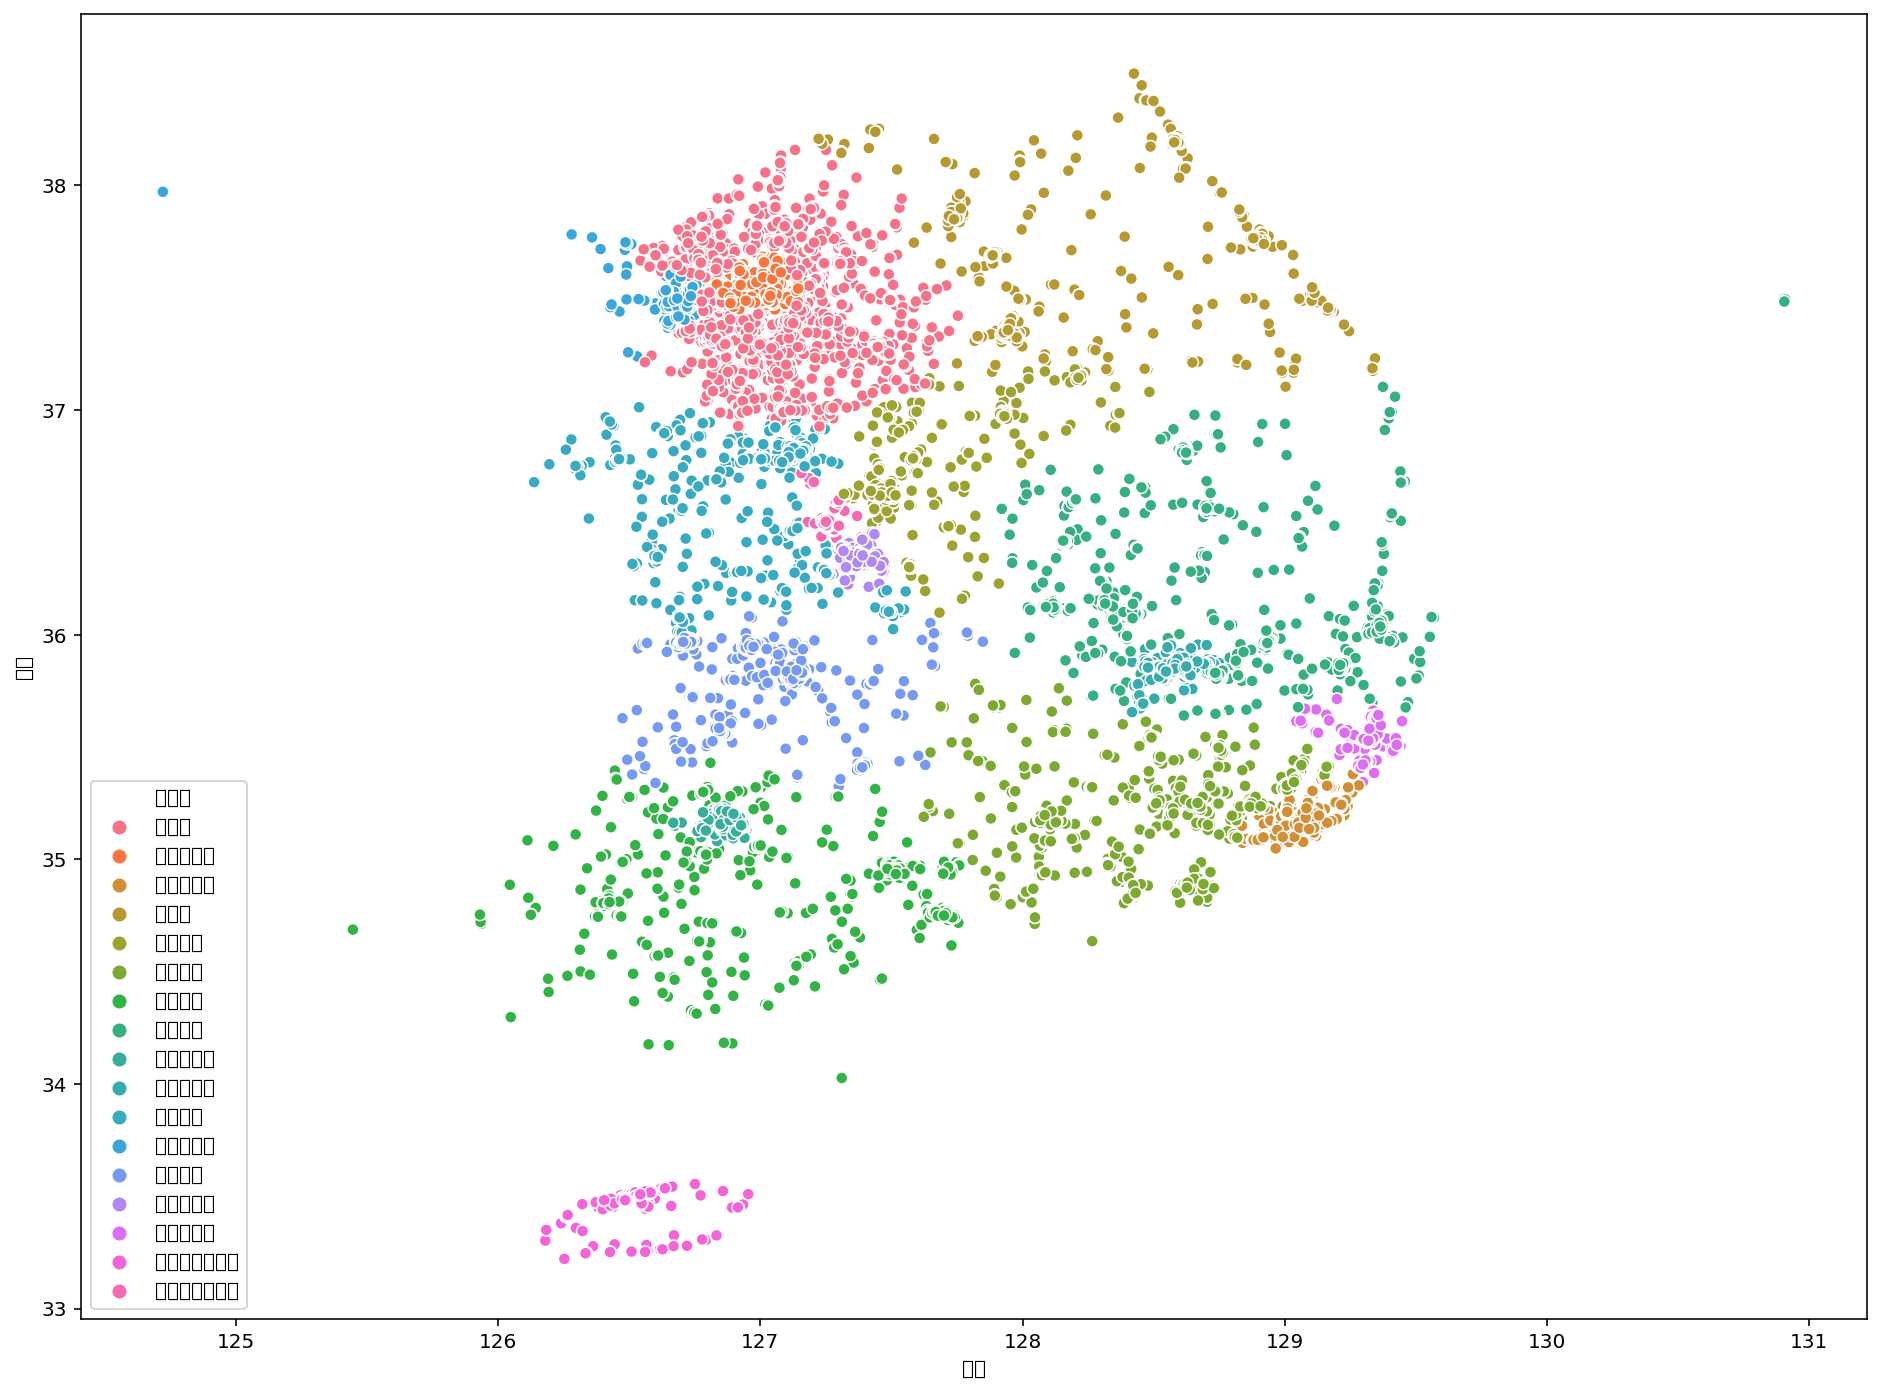

In [ ]:
plt.figure(figsize=(16,12))
sns.scatterplot(data=df, x="경도", y="위도",hue="시도명")

In [ ]:
# Folium

import folium
folium.Map()

In [ ]:
# 지도의 중심을 지정하기 위해 위도와 경도의 평균을 구합니다.
df_seoul_hospital["위도"].mean()
df_seoul_hospital["경도"].mean()

126.9963589356625

In [ ]:
map = folium.Map(location=[df_seoul_hospital["위도"].mean(), df_seoul_hospital["경도"].mean()],zoom_start=12)

for i in df_seoul_hospital.index:
  name = df_seoul_hospital.loc[i, "상호명"]
  address = df_seoul_hospital.loc[i, "도로명주소"]
  popup = f"{name}-{address}"
  location = [df_seoul_hospital.loc[i,"위도"],df_seoul_hospital.loc[i,"경도"]]
  print(popup)
  folium.Marker(
      location = location,
      popup = popup,
).add_to(map)
map

대진의료재단-서울특별시 광진구 긴고랑로 119
홍익병원별관-서울특별시 양천구 국회대로 250
SNUH-서울특별시 강남구 테헤란로26길 10
한양-서울특별시 성동구 마조로 22-2
백산의료재단친구병원-서울특별시 강동구 올림픽로 684
서울보훈병원-서울특별시 강동구 진황도로61길 53
서울대학교병원-서울특별시 강남구 테헤란로 152
제일병원-서울특별시 중구 서애로1길 17
이랜드클리닉-서울특별시 금천구 가산디지털1로 186
사랑나눔의료재단-서울특별시 서대문구 서소문로 21
우울증센터-서울특별시 성북구 안암로 145
성심의료재단-서울특별시 영등포구 버드나루로 55
다나의료재단-서울특별시 구로구 개봉로 126
서울아산병원신관-서울특별시 송파구 올림픽로43길 88
고려대학교구로병원-서울특별시 구로구 구로동로 148
학교법인일송학원-서울특별시 영등포구 버드나루로 55
희명스포츠의학센터인공신장실-서울특별시 금천구 시흥대로 230
연세대학교의과대학강남세브란스-서울특별시 강남구 언주로 211
국립정신병원-서울특별시 광진구 능동로 398
코아클리닉-서울특별시 강남구 선릉로86길 31
한국전력공사부속한일병원-서울특별시 도봉구 우이천로 308
신촌연세병원-서울특별시 마포구 서강로14길 14
영동세브란스병원-서울특별시 강남구 언주로 211
삼성의료재단강북삼성태-서울특별시 중구 세종대로 67
서울시립보라매병원-서울특별시 동작구 보라매로5길 20
서울대학교병원비상계획외래-서울특별시 종로구 대학로 101
평화드림서울성모병원의료-서울특별시 서초구 반포대로 222
홍익병원-서울특별시 양천구 목동로 227
사랑나눔의료재단서-서울특별시 서대문구 서소문로 21
우신향병원-서울특별시 성북구 안암로 99
동부제일병원-서울특별시 중랑구 양원역로 2
아산재단금강병원-서울특별시 용산구 이촌로 318
명곡안연구소-서울특별시 영등포구 영신로 136
아산재단서울중앙병원-서울특별시 송파구 올림픽로43길 88
메디힐특수여객-서울특별시 양천구 남부순환로 331
삼성생명공익재단삼성서-서울특별시 강남구 일원로 81
성광

In [ ]:
# 자율주제를 세우고 직접 분석해보기
# 상권업종중분류명, 상권업종소분류명 중에 관심있는 분류명을 색인후에 시도별, 시군구별 분석을 해보세요
# 예시)
    # 언어치료는 시군구별로 어디에 많이 위치할까?
    # 의료시설은 서울과 강남에 집중되어 있을까?
    # 강남에는 피부과, 성형외과가 다른 지역에 비해 많을까?